
##**Web Structure Mining**



# 1. Write a python program to calculate the degree prestige, proximity prestige and rank
# prestige using a graph dataset given in the following link.
http://snap.stanford.edu/data/wiki-Vote.txt.gz

In [ ]:
import networkx as nx
import numpy as np

G_wv = nx.read_edgelist("Wiki-Vote.txt", create_using = nx.DiGraph(Directed=True), nodetype=int)
print(nx.info(G_wv))

n_nodes = G_wv.number_of_nodes()
degree_prestige = dict((v,len(G_wv.in_edges(v))/(n_nodes-1)) for v in G_wv.nodes())
print("Degree Prestige")

for i in degree_prestige:
    print(i, " : ", degree_prestige[i])

distance = []
temp_dis = 0
n = 0
for dest in G_wv.nodes:
    temp_dis = 0
    n = 0
    for src in G_wv.nodes:
        if (nx.has_path(G_wv,src,dest) == True):
            temp_dis = temp_dis + nx.shortest_path_length(G_wv,source = src,target = dest)
            n = n + 1
    if temp_dis == 0:
        distance.append([dest, 0])
    else:
        distance.append([dest, temp_dis/(n - 1)])
print("\n\n\n")
print("Proximity Prestige")
for i in distance:
    print(str(i[0]) + " : " + str(i[1]))


prominance = np.random.randint(1, 4000, size=n_nodes)
print("\n\n\n")
print("Prominance taken")
print(prominance)
rank_prestige = np.zeros([n_nodes], dtype = int)
path_matrix = np.zeros([n_nodes, n_nodes], dtype = int)
i = 0
j = 0
for src in G_wv.nodes:
    for dest in G_wv.nodes:
        if G_wv.has_edge(dest, src):
            path_matrix[i][j] = 1
        j = j+1
    j = 0
    i = i+1
for i in range(n_nodes):
    pr_i = 0
    for j in range(n_nodes):
        pr_i = pr_i + path_matrix[i][j] * prominance[j]
    rank_prestige[i] = pr_i
print("\n\n\n")
print("Rank Prestige")
print(rank_prestige)

Streaming output truncated to the last 5000 lines.
481 : 0
486 : 0
473 : 0
489 : 0
490 : 0
492 : 0
493 : 0
494 : 0
497 : 0
498 : 0
499 : 0
501 : 0
502 : 0
504 : 0
507 : 0
513 : 0
511 : 0
509 : 0
516 : 0
519 : 0
520 : 0
525 : 3.493408297789841
521 : 0
522 : 0
523 : 0
445 : 0
527 : 0
528 : 0
531 : 0
530 : 0
529 : 0
534 : 0
536 : 0
539 : 0
540 : 0
541 : 0
542 : 0
543 : 0
544 : 0
7646 : 3.2127906976744187
546 : 0
3811 : 3.415390579569684
4199 : 3.3085127011828583
5298 : 3.5854982551376504
5807 : 3.089974791545472
6421 : 3.526662788442893
6590 : 3.6151609150833655
551 : 0
218 : 0
547 : 0
548 : 0
550 : 0
552 : 0
553 : 0
554 : 1.0
555 : 0
556 : 0
557 : 0
558 : 0
561 : 0
562 : 0
563 : 0
565 : 3.9744037230948224
568 : 0
569 : 0
570 : 0
571 : 0
572 : 0
573 : 0
574 : 0
576 : 0
577 : 0
578 : 0
580 : 0
2258 : 3.0416909055652512
5103 : 3.1925538103548576
5500 : 3.2844677137870857
583 : 0
582 : 0
4562 : 3.3483908491663437
4605 : 3.36189183950378
4728 : 3.5072688505524328
585 : 0
588 : 0
591 : 0
595 :


# 2. Write a python program to show the implementation Page Rank algorithm for the
# following graph. Update and display the page rank for all the nodes after each
# iteration. Count and display the total number of iterations required to meet the
# stopping criteria. (stopping criteria:- ε = 0.05, damping factor = 0.9)


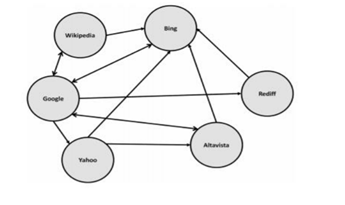



Iteration  1
Page Rank =  [0.04666667 0.42166667 0.31666667 0.04666667 0.12166667 0.04666667] 

Iteration  2
Page Rank =  [0.07366667 0.21241667 0.47191667 0.07366667 0.09466667 0.07366667] 

Iteration  3
Page Rank =  [0.10161167 0.27681167 0.28359167 0.10161167 0.13476167 0.10161167] 

Iteration  4
Page Rank =  [0.06771317 0.31125692 0.37216517 0.06771317 0.11343842 0.06771317] 

Iteration  5
Page Rank =  [0.0836564  0.25658738 0.3783161  0.0836564  0.11412732 0.0836564 ] 

Iteration  6
Page Rank =  [0.08476357 0.28670237 0.33659799 0.08476357 0.12240894 0.08476357] 

Number of iteration =  6


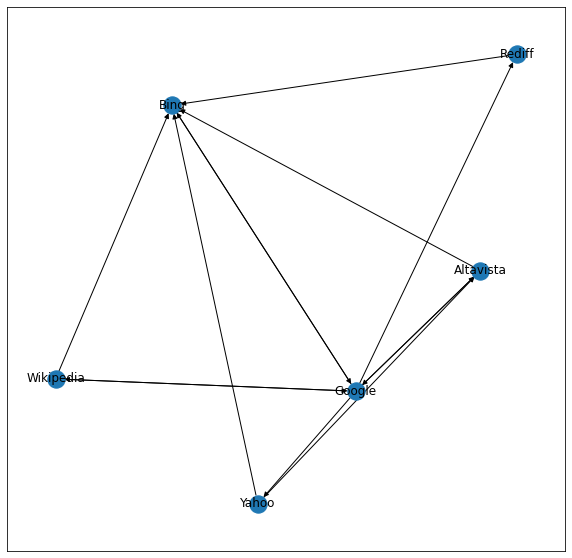

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph(Directed=True)

G.add_edge("Wikipedia", "Bing")
G.add_edge("Wikipedia", "Google")
G.add_edge("Google","Wikipedia")
G.add_edge("Google","Bing")
G.add_edge("Bing", "Google")
G.add_edge("Rediff", "Bing")
G.add_edge("Altavista", "Bing")
G.add_edge("Yahoo", "Bing")
G.add_edge("Google","Rediff")
G.add_edge("Google","Altavista")
G.add_edge("Altavista", "Google")
G.add_edge("Yahoo", "Altavista")
G.add_edge("Google","Yahoo")

pos= nx.circular_layout(G)

plt.figure(figsize =(10, 10)) 
nx.draw_networkx(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)


n = G.number_of_nodes()
A = nx.to_numpy_array(G)
is_sink = np.sum(A, axis=0)==0
p=0
for i in is_sink:
     if i == True:   
       for j in range(len(A[p])):
          A[p][j]=1/len(A[p])
     else:
       rsum=np.sum(A[p])
       for j in range(len(A[p])):
           if A[p][j]>0:
              A[p][j]=1/rsum
     p=p+1   
        
d=0.9
E=np.ones_like(A)
len(E[0])
for i in range(len(E[0])):
     for j in range(len(E[0])):
         E[i][j]=E[i][j]/n
E=(1-d)*E
At=np.transpose(A)
At=(d*(At))
x=np.add(E,At)
sc=0.05

p_0 =[1/6,1/6,1/6,1/6,1/6,1/6]
k=0   
flag = 0
p_k=0
pr = []
while  flag==0:    
  if k==0:
      p_kn=np.dot(x,p_0)
      v=np.subtract(p_kn,p_0)
      pr.append(p_kn)
  else:    
       p_k=p_kn
       p_kn =np.dot(x,p_k)
       pr.append(p_kn)
       v=np.subtract(p_kn,p_k)
  k=k+1
  temp=0
  for i in range(len(v)):
      if v[i]<0:
          v[i]=v[i]*(-1)
  for i in v:
      if i>=sc:
          temp=1
          break;
  if temp ==1:
      continue
        
  flag=1

for i in range(0,len(pr)):
  print("Iteration ",i+1)
  print("Page Rank = ",pr[i],"\n")

print("Number of iteration = ", len(pr))

# 3. Write a python program to show the implementation HITS algorithm for the above
# graph and display the authority as well as hub score for all the nodes after each
# iteration. Count and display the total number of iterations required to meet the
# stopping criteria. (stopping criteria:- ε = 0.05 for both hub and authority)

Iteration  1
Authority =  [0.29210312 0.70104749 0.29210312 0.29210312 0.40894437 0.29210312]
Hub score =  [0.45363838 0.17011439 0.56704798 0.28352399 0.45363838 0.39693358] 

Iteration  2
Authority =  [0.25629192 0.74626178 0.29398191 0.25629192 0.39951388 0.25629192]
Hub score =  [0.41847333 0.13949111 0.62403917 0.27898222 0.41847333 0.40379005] 

Iteration  3
Authority =  [0.24583037 0.75588    0.30486837 0.24583037 0.39294146 0.24583037]
Hub score =  [0.40108692 0.12551661 0.64834521 0.27557031 0.40108692 0.40769306] 

Number of iteration =  3


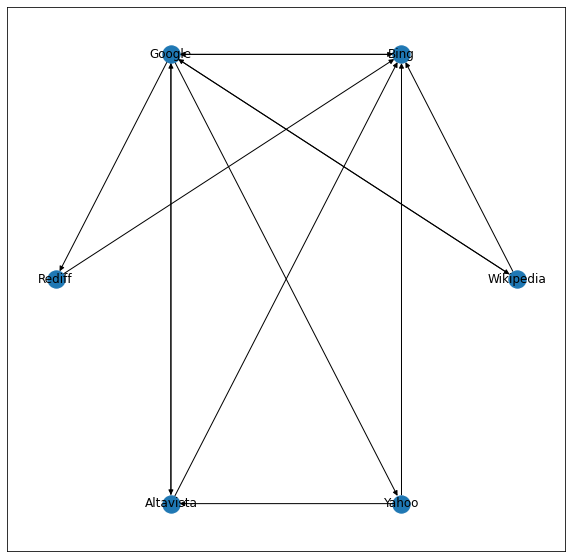

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math

G = nx.DiGraph(Directed=True)

G.add_edge("Wikipedia", "Bing" )
G.add_edge("Wikipedia", "Google" )
G.add_edge("Google","Wikipedia" )
G.add_edge("Google","Bing" )
G.add_edge("Bing", "Google" )
G.add_edge("Rediff", "Bing" )
G.add_edge("Altavista", "Bing" )
G.add_edge("Yahoo", "Bing" )
G.add_edge("Google","Rediff" )
G.add_edge("Google","Altavista" )
G.add_edge("Altavista", "Google" )
G.add_edge("Yahoo", "Altavista" )
G.add_edge("Google","Yahoo" )

pos= nx.circular_layout(G)

plt.figure(figsize =(10, 10)) 
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

n = G.number_of_nodes()
L = nx.to_numpy_array(G)
h0=a0=[1]*n
k=0
Lt=np.transpose(L)
x=np.dot(Lt,L)
y=np.dot(L,Lt)
flag=0
sc=0.05
def Normalize(l1):
   y=0
   for x in l1:
     y+=(x*x)
   y= math.sqrt(y)
   for i in range(len(l1)):
      l1[i]=l1[i]/y
   return l1
  
A = []
H = []


while   flag==0:    
  if k==0:
      ak=np.dot(x,a0)
      ak=Normalize(ak)
      hk=np.dot(y,h0)
      hk=Normalize(hk)
      A.append(ak)
      H.append(hk)
      v1=np.subtract(ak,a0)
      v2=np.subtract(hk,h0)
  else:    
       akn=ak
       ak =np.dot(x,akn)
       ak=Normalize(ak)
       v1=np.subtract(ak,akn)
       hkn=hk
       hk =np.dot(y,hkn)
       hk=Normalize(hk)
       A.append(ak)
       H.append(hk)
       v2=np.subtract(hk,hkn)
       
       
  k=k+1
  temp1=0
  temp2=0
  for i in range(len(v1)):
      if v1[i]<0:
          v1[i]=v1[i]*(-1)
  for i in range(len(v2)):
      if v2[i]<0:
          v2[i]=v2[i]*(-1)        
  for i in v1:
      if i>=sc:
          temp1=1
          break;
  for i in v2:
      if i>=sc:
          temp2=1
          break;        
          
  if ((temp1==1) or (temp2==1)):
      continue
        
  flag=1

for i in range(0,len(A)):
  print("Iteration ",i+1)
  print("Authority = ",A[i])
  print("Hub score = ",H[i],"\n")

print("Number of iteration = ", len(A))

# 4. Write a python program to calculate the maximum flow in the following graph using
# Ford-Fulkerson Max flow algorithm.

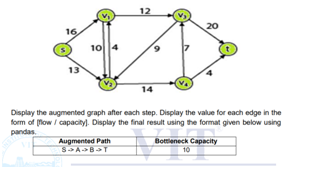

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

class Graph:
    def __init__(self, graph):
        self.graph = graph
        self. ROW = len(graph)

    def searching_algo_BFS(self, s, t, parent):
        visited = [False] * (self.ROW)
        queue = []
        queue.append(s)
        visited[s] = True
        while queue:
            u = queue.pop(0)
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
        return True if visited[t] else False

    def ford_fulkerson(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0
        ap=[]
        bn_cap=[]
        while self.searching_algo_BFS(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min(path_flow, self.graph[parent[s]][s])
                s = parent[s]

            max_flow += path_flow
            temp=[]
            v = sink
            temp_g=graph
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                if(u==source):
                    ap.append(temp[::-1])
                    bn_cap.append(path_flow)
                    temp=[]
                    G = nx.from_numpy_matrix(np.matrix(graph), create_using=nx.DiGraph)
                    layout = nx.circular_layout(G)
                    nx.draw(G, layout, node_size=1000, with_labels=True, font_weight='bold',font_size=15)
                    labels = nx.get_edge_attributes(G,'weight')
                    labels2 = nx.get_edge_attributes(G,'weight')
                    for i in labels:
                        if ((i[1],i[0]) in labels):
                            temp=labels[(i[0],i[1])]+labels[(i[1],i[0])]
                            labels2[i]=str(labels[i])+"/"+str(labels[(i[0],i[1])]+labels[(i[1],i[0])])
                        else:
                            labels2[i]=str(labels[i])+"/"+str(labels[i])
                    nx.draw_networkx_edge_labels(G,pos=layout,edge_labels=labels2)
                    plt.show()
                else:
                    temp.append(u)
                v = parent[v]
        return ap,bn_cap,max_flow

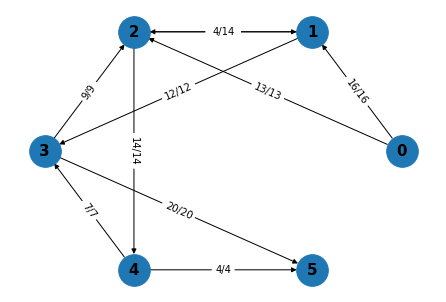

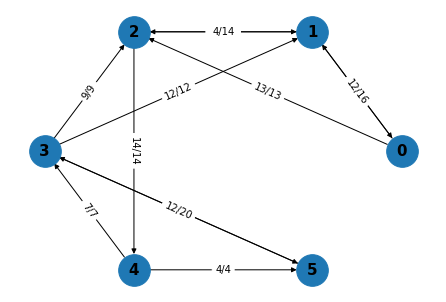

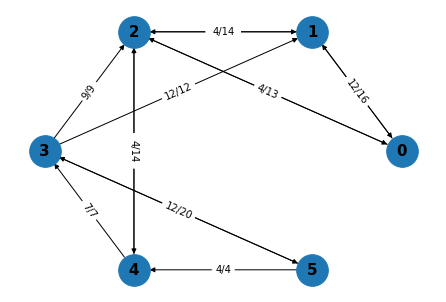

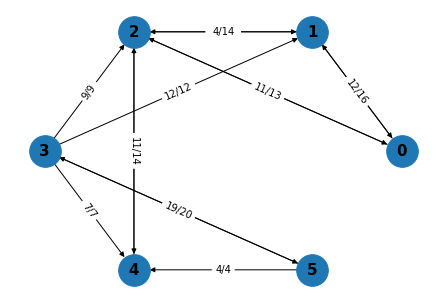

             Augmented Path  Bottleneck Capacity
0        S -> V1 -> V3 -> T                   12
1        S -> V2 -> V4 -> T                    4
2  S -> V2 -> V4 -> V3 -> T                    7
Max Flow :  23


In [ ]:
graph = [[0,16, 13, 0, 0, 0],
         [0,0, 10, 12, 0, 0],
         [0, 4, 0, 0, 14, 0],
         [0, 0, 9, 0, 0, 20],
         [0, 0, 0, 7, 0, 4],
         [0, 0, 0, 0, 0, 0]]
flow=[]

G = nx.from_numpy_matrix(np.matrix(graph), create_using=nx.DiGraph)
layout = nx.circular_layout(G)
nx.draw(G, layout, node_size=1000, with_labels=True, font_weight='bold',font_size=15)
labels = nx.get_edge_attributes(G,'weight')
labels2 = nx.get_edge_attributes(G,'weight')
for i in labels:
    if ((i[1],i[0]) in labels):
        temp=labels[(i[0],i[1])]+labels[(i[1],i[0])]
        labels2[i]=str(labels[i])+"/"+str(labels[(i[0],i[1])]+labels[(i[1],i[0])])
    else:
        labels2[i]=str(labels[i])+"/"+str(labels[i])
nx.draw_networkx_edge_labels(G,pos=layout,edge_labels=labels2)
plt.show()

g = Graph(graph)
source = 0
sink = 5
ap,bn_cap,mx_f = g.ford_fulkerson(source, sink)

au_pa=[]
for i in range(0,len(ap)):
    temp="S -> "
    for j in range(0,len(ap[i])):
        temp+= "V"+str(ap[i][j])+" -> "
    temp+="T"
    au_pa.append(temp)
    
data = {'Augmented Path':au_pa,'Bottleneck Capacity':bn_cap}
df = pd.DataFrame(data)

print(df)
print("Max Flow : ",mx_f)